# Домашнее задание 4 - предобработка признаков, pandas, линейная регрессия

### Выполнила: Иванова Елизавета Дмитриевна, НПМбд-01-19

Дата выдачи: 28.09.2022

Срок сдачи: 09.10.2022 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(x):
    
    y = np.zeros(len(x)) == 1
    y[1:] = (x == 0)[:-1]
    
    return x[y].max()

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    
    return np.argmin(np.abs(X-v))

In [5]:
X = np.arange(0,10).reshape((2, 5)) 
v = 3.6

nearest_value(X, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    
    standard_deviation = X.std(axis=0)
    standard_deviation[standard_deviation == 0] = 1
    
    X = X - X.mean(axis=0) # выборочное среднее
    X /= standard_deviation
    
    return X

In [7]:
X = np.random.randint(1, 10, size=(3,5))

print(X)
scale(X)

[[6 9 8 1 3]
 [3 1 5 7 2]
 [7 4 6 3 7]]


array([[ 0.39223227,  1.31319831,  1.33630621, -1.06904497, -0.46291005],
       [-1.37281295, -1.1111678 , -1.06904497,  1.33630621, -0.9258201 ],
       [ 0.98058068, -0.20203051, -0.26726124, -0.26726124,  1.38873015]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    
    print('Determinant:', np.linalg.det(X).round(8))
    print('Trace:', np.trace(X).round(8))
    print('Min element:', np.min(X).round(8))
    print('Max element:', np.max(X).round(8))
    print('Frobenius norm:', np.linalg.norm(X, ord='fro').round(8))
    print('\nEigenvalues: ', np.linalg.eigvals(X))
    print('\nInverse matrix:\n', np.linalg.inv(X).round(8))
                      
    return

In [9]:
X = np.random.normal(10, 1, (3, 3))
X

array([[11.13119074,  9.9290487 ,  9.67494865],
       [ 9.67483291, 11.43597499,  9.97341931],
       [10.69999486,  8.31903803,  9.17035227]])

In [10]:
get_stats(X)

Determinant: 17.28244521
Trace: 31.73751799
Min element: 8.31903803
Max element: 11.43597499
Frobenius norm: 30.12870226

Eigenvalues:  [30.03565964  0.46533495  1.23652339]

Inverse matrix:
 [[ 1.26733598 -0.61140703 -0.67212159]
 [ 1.04116688 -0.08360857 -1.00752648]
 [-2.42324337  0.78923849  1.80727503]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

95-квантиль – такое число, чтобы 95% чисел распределения было меньше этого квантиля

In [11]:
exp = np.empty(100)

for exp_num in range(100):
    
    A = np.empty(1000)

    for i in range(1000):
        a1 = np.random.normal(0, 1, (10, 10))
        a2 = np.random.normal(0, 1, (10, 10))
        A[i] = np.max(a1.dot(a2))
    
    exp[exp_num] = np.average(A)
        
print('Cреднее значение по экспериментам у максимальных элементов:', np.average(exp))
print('95-процентная квантиль', np.percentile(exp, 95))

Cреднее значение по экспериментам у максимальных элементов: 8.406303663139594
95-процентная квантиль 8.507867819274407


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [12]:
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [14]:
airports = pd.read_csv('airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [15]:
cancel = df['CancellationCode']
cancel.value_counts()

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

In [16]:
print('Самая частая причина отмены рейса: A (carrier)')

Самая частая причина отмены рейса: A (carrier)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [17]:
distances = df['Distance']

print('Среднее расстояние:', distances.mean(), 'miles')
print('Минимальное расстояние:', distances.min(), 'miles')
print('Максимальное расстояние:', distances.max(), 'miles')

Среднее расстояние: 724.5082571428571 miles
Минимальное расстояние: 31 miles
Максимальное расстояние: 4962 miles


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [18]:
date = ['Year', 'Month', 'DayofMonth']
flight = ['FlightNum', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']

In [19]:
when_where = df[distances == distances.min()][date + flight].drop_duplicates()
when_where

,Year,Month,DayofMonth,FlightNum,UniqueCarrier,Origin,Dest,Distance
1116,2008,12,30,65,AS,WRG,PSG,31
6958,2008,12,26,65,AS,WRG,PSG,31
17349,2008,8,18,64,AS,PSG,WRG,31
27534,2008,3,11,64,AS,PSG,WRG,31
46082,2008,8,9,65,AS,WRG,PSG,31
48112,2008,2,28,64,AS,PSG,WRG,31


In [20]:
other_flights = df[((df['FlightNum'] == 64) | (df['FlightNum'] == 65)) & (df['UniqueCarrier'] == 'AS')]
other_flights[flight].sort_values('Distance').drop_duplicates('Distance')

,FlightNum,UniqueCarrier,Origin,Dest,Distance
1116,65,AS,WRG,PSG,31
64203,65,AS,KTN,WRG,82
65662,65,AS,PSG,JNU,123
43353,64,AS,ANC,JNU,571
1517,65,AS,SEA,KTN,680


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [21]:
departure = df['Origin'].value_counts()
max_departures = departure.max()
city = airports[airports['iata'] == departure.index[0]]['city']

In [22]:
print('Аэропорт, из которого было произведено больше всего вылетов:', departure.index[0])
print('Город:', ''.join(city))
print('Количество вылетов:', max_departures)

Аэропорт, из которого было произведено больше всего вылетов: ATL
Город: Atlanta
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [23]:
airport = df.groupby('Origin')['AirTime'].mean()
airport.sort_values()

Origin
GST     13.000000
WRG     18.000000
OXR     19.666667
PSG     20.250000
MKG     21.500000
          ...    
STT    185.029412
PSE    191.875000
BQN    193.954545
SJU    205.200000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64

In [24]:
airport_max = airport.idxmax()
airports[airports['iata'] == airport_max]

,iata,airport,city,state,country,lat,long
2962,SJU,Luis Munoz Marin International,San Juan,PR,USA,18.439417,-66.001833


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [25]:
all_flights = df.groupby("Origin").size()
delayed_flights = df[df['DepDelay'] > 0].groupby('Origin').size()

In [26]:
all_flights[all_flights > 1000]

Origin
ATL    4134
BOS    1162
BWI    1032
CLT    1250
DEN    2383
DFW    2793
DTW    1610
EWR    1389
IAH    1795
JFK    1201
LAS    1793
LAX    2082
LGA    1169
MCO    1338
MSP    1254
ORD    3550
PHL    1027
PHX    2031
SEA    1128
SFO    1408
SLC    1325
dtype: int64

In [27]:
delayed_flights[all_flights > 1000]

Origin
ATL    1739
BOS     376
BWI     467
CLT     498
DEN    1063
DFW    1283
DTW     569
EWR     710
IAH     841
JFK     444
LAS     779
LAX     859
LGA     358
MCO     537
MSP     459
ORD    1649
PHL     432
PHX     858
SEA     495
SFO     558
SLC     424
dtype: int64

In [28]:
share_of_delayed_flights = delayed_flights[all_flights > 1000] / all_flights[all_flights > 1000]
share_of_delayed_flights

Origin
ATL    0.420658
BOS    0.323580
BWI    0.452519
CLT    0.398400
DEN    0.446076
DFW    0.459363
DTW    0.353416
EWR    0.511159
IAH    0.468524
JFK    0.369692
LAS    0.434467
LAX    0.412584
LGA    0.306245
MCO    0.401345
MSP    0.366029
ORD    0.464507
PHL    0.420643
PHX    0.422452
SEA    0.438830
SFO    0.396307
SLC    0.320000
dtype: float64

In [29]:
airport_with_max_share = share_of_delayed_flights.idxmax()
airports[airports['iata'] == airport_with_max_share]

,iata,airport,city,state,country,lat,long
1436,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [30]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [31]:
airports = pd.read_csv('airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


 - Имеются ли в данных пропущенные значения?

In [32]:
true_or_false = df.isna().any()

if true_or_false.any() == True:
    print("Да")
else:
    print("Нет")

Да


- Сколько всего пропущенных элементов в таблице "объект-признак"?

In [33]:
empty = df.isnull().sum().sum()
        
print('Всего пропущенных элементов в таблице:', empty)

Всего пропущенных элементов в таблице: 355215


In [34]:
empty_column = df.isnull().sum()

print('Всего пропущенных элементов в каждом столбце:\n')
print(empty_column)

Всего пропущенных элементов в каждом столбце:

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


In [35]:
empty_row = df.isnull().sum(axis=1)

print('Всего пропущенных элементов в каждоЙ строке:\n')
print(empty_row)

Всего пропущенных элементов в каждоЙ строке:

0        6
1        6
2        6
3        6
4        6
        ..
69995    6
69996    1
69997    6
69998    1
69999    6
Length: 70000, dtype: int64


- Сколько объектов имеют хотя бы один пропуск?

In [36]:
count_0 = list(empty_row).count(0)
count_row = len(df.axes[0])
count = count_row - count_0

print('Количесто объектов, которые имеют хотя бы один пропуск:', count)

Количесто объектов, которые имеют хотя бы один пропуск: 70000


- Сколько признаков имеют хотя бы одно пропущенное значение?

In [37]:
count_0 = list(empty_column).count(0)
count_column = len(df.axes[1])
count = count_column - count_0

print('Количесто признаков, которые имеют хотя бы один пропуск:', count)

Количесто признаков, которые имеют хотя бы один пропуск: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?

In [38]:
true_or_false = df['DepDelay'].isnull().any()

if true_or_false == True:
    print("Да")
else:
    print("Нет")

Да


- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [39]:
df[df['DepDelay'].isnull() == True]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [40]:
df[df['DepDelay'].isnull() == False]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


У всех объектов с пропущенными значениями целевой переменной Cancelled = 1 $ \Rightarrow $ все рейсы отменены. У этих объектов из-за этого также есть пропуски в признаках DepTime, ArrTime, TaxiIn, TaxiOut.

In [41]:
df.loc[:, ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 
           'LateAircraftDelay', 'CancellationCode']].isnull().sum()

CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
CancellationCode     68589
dtype: int64

In [42]:
len(df)

70000

In [43]:
54747/700, 68589/700

(78.21, 97.98428571428572)

Удалим признаки CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay и CancellationCode, так как у них 78,21% пустых данных. Также удалим CancellationCode, так как у них 97.98% пустых данных. И удалим Cancelled, так как у нас останутся только неотменённые рейсы (Cancelled = 0).

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [44]:
Df = df[(df['DepDelay'].isnull() == False)]
Df = Df[(df['DepDelay'] != 0)]
Df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 
         'CancellationCode', 'Cancelled'], axis = 1, inplace = True)
Df = Df.reset_index()
Df = Df.drop('index', axis=1)

<ipython-input-44-b15b040c79d3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Df = Df[(df['DepDelay'] != 0)]


In [45]:
len(Df[Df['Diverted'] == 0])

63252

Можно ещё удалить Diverted.

In [46]:
Df.drop('Diverted', axis = 1, inplace = True)

In [47]:
y = Df['DepDelay']
DF = Df.drop('DepDelay', axis = 1)
DF

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,N655CA,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0
63400,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,N988DL,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0
63401,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,N776SK,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0
63402,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,N318US,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [48]:
def Hour(time):
    
    if np.isnan(time):
        return np.NaN
    
    else:
        hour = str(int(time))[:-2]
        
        if hour == '':
            return np.NaN 
        else:
            return int(hour)
        
def Minute(time):
    
    if np.isnan(time):
        return np.NaN
    
    else: 
        minute = str(int(time))[-2:]
        
        if minute == '':
            return np.NaN 
        else:
            return int(minute)

In [49]:
DF['DepTime_Hour'] = DF['DepTime'].apply(Hour)
DF['DepTime_Minute'] = DF['DepTime'].apply(Minute)
DF['CRSDepTime_Hour'] = DF['CRSDepTime'].apply(Hour)
DF['CRSDepTime_Minute'] = DF['CRSDepTime'].apply(Minute)
DF['ArrTime_Hour'] = DF['ArrTime'].apply(Hour)
DF['ArrTime_Minute'] = DF['ArrTime'].apply(Minute)
DF['CRSArrTime_Hour']  = DF['CRSArrTime'].apply(Hour)
DF['CRSArrTime_Minute']  = DF['CRSArrTime'].apply(Minute)

DF.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)
DF

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiIn,TaxiOut,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,3.0,8.0,21.0,11,20.0,55,23.0,8.0,23.0,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,4.0,12.0,14.0,26,14.0,10,17.0,30.0,17.0,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,4.0,9.0,11.0,43,11.0,45,15.0,1.0,15.0,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,4.0,19.0,11.0,41,11.0,44,13.0,23.0,13.0,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,4.0,8.0,8.0,15,8.0,20,12.0,43.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,12.0,13.0,9.0,20,9.0,25,11.0,10.0,11.0,18
63400,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,22.0,20.0,18.0,29,18.0,40,21.0,37.0,21.0,49
63401,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,4.0,13.0,11.0,49,11.0,25,13.0,36.0,13.0,14
63402,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,20.0,22.0,19.0,6,19.0,0,22.0,0.0,21.0,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [50]:
X = DF.drop(['TailNum', 'Year'], axis = 1)

In [51]:
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

In [52]:
import seaborn as sns
%matplotlib inline

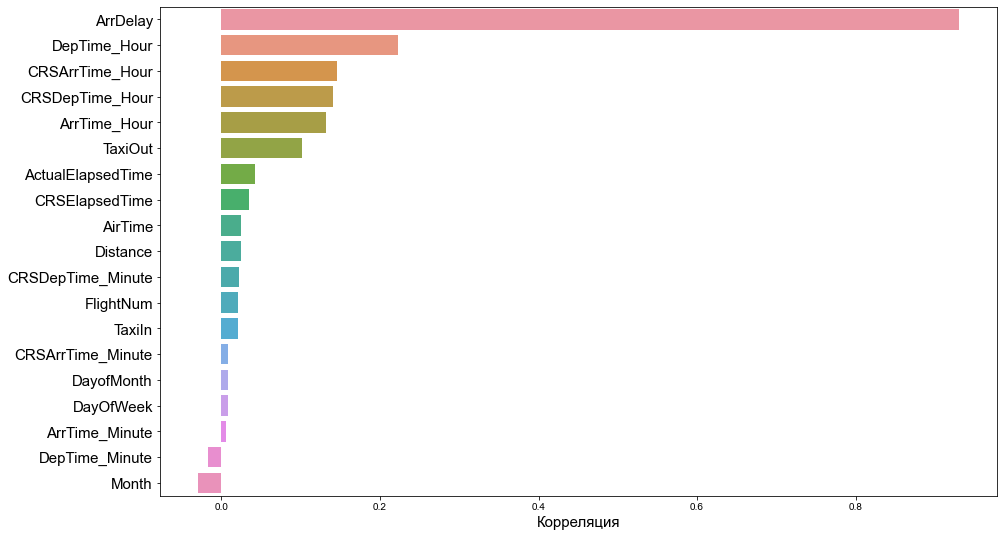

In [53]:
X = X.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X[feature], y)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y = features_order, x = correlations)
sns.set_style('whitegrid')
plot.set_xlabel('Корреляция', fontsize = 15)
plot.set_yticklabels(features_order, fontsize = 15)
plot.figure.set_size_inches(15, 9)

Признак ArrDelay сильно коррелирует, поэтому исключаем его.

In [54]:
X.drop('ArrDelay', axis = 1, inplace = True)

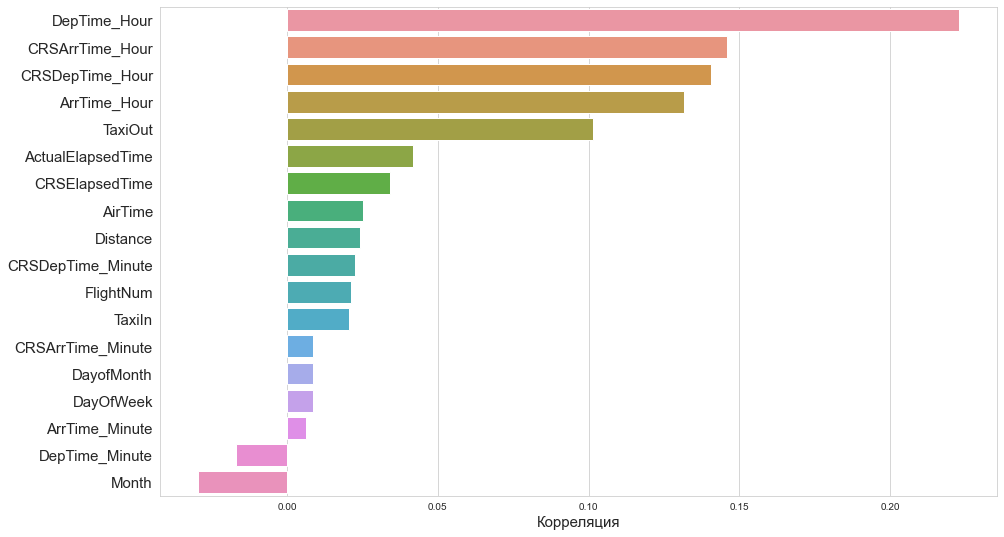

In [55]:
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X = X.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X[feature], y)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y = features_order, x = correlations)
sns.set_style('whitegrid')
plot.set_xlabel('Корреляция', fontsize = 15)
plot.set_yticklabels(features_order, fontsize = 15)
plot.figure.set_size_inches(15, 9)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

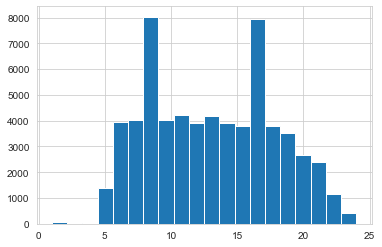

In [56]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

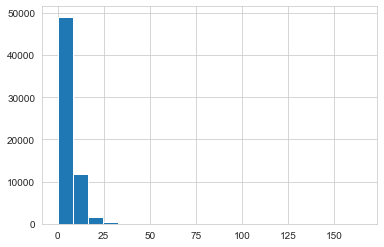

In [57]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

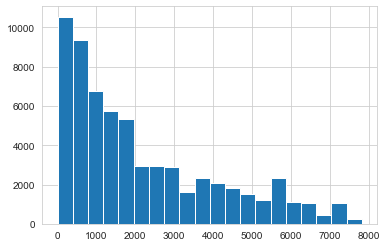

In [58]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

*Масштабирование поможет избежать такого большого отличия в значениях признаков.*

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
def transform_data(data):
    
    # Замена пропущенных значений на нули для вещественных признаков
    numeric_features = data.select_dtypes([np.number]).columns
    data[numeric_features] = data[numeric_features].fillna(0)
    
    # Масштабирование вещественных признаков с помощью StandardScaler
    data[numeric_features] = StandardScaler().fit_transform(data[numeric_features])
    
    # Замена пропущенных значений на строки 'nan' для категориальных признаков
    categorical_features = data.select_dtypes([object]).columns
    data[categorical_features] = data[categorical_features].fillna('nan')
    
    # One-hot-кодирование категориальных признаков с помощью функции pd.get_dummies
    categorical_data = pd.get_dummies(data[categorical_features])
    
    # Метод должен возвращать преобразованный DataFrame, который должна состоять из 
    # масштабированных вещественных признаков и закодированных категориальных
    data = pd.concat([data, categorical_data], axis = 1)
    
    # удаление исходных категориальных признаков
    data.drop(categorical_features, axis = 1, inplace = True)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [61]:
X_transform = transform_data(X)
X_transform

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.997818,-0.917095,-0.855859,-0.744130,-0.791728,-0.741449,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.045399,0.127248,0.060524,0.183961,-0.586761,-0.389973,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.153613,0.370452,0.311790,0.471018,-0.586761,-0.653580,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.358134,-0.259016,-0.368107,-0.347886,-0.586761,0.225109,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.295765,0.441982,0.474374,0.634799,-0.586761,-0.741449,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.244412,-0.230404,-0.279425,-0.120706,1.052971,-0.302104,...,0,0,0,0,0,0,0,0,0,0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.011461,-0.001506,-0.264644,-0.217566,3.102635,0.312978,...,0,0,0,0,0,0,0,0,0,0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.139970,-1.145993,-1.092345,-1.043514,-0.586761,-0.302104,...,0,0,0,0,0,0,0,0,0,0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.518272,1.286040,1.302075,1.208912,2.692702,0.488715,...,0,0,0,0,0,0,0,0,0,0


Был 21 признак, стало 632 признака.

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, train_size=0.7, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа).

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import r2_score

In [65]:
# train - подвыборка (на чем учим)
# test - контрольная выборка (что учим)

Linear_Regression = LinearRegression().fit(X_train[0:1000], y_train[0:1000])

In [66]:
# подвыборка
y_train_predict = Linear_Regression.predict(X_train[0:1000])
print('MSE подвыборки:', mse(y_train[0:1000], y_train_predict))
print('R2 подвыборки:', r2_score(y_train[0:1000], y_train_predict))

MSE подвыборки: 381.82221775627136
R2 подвыборки: 0.6397280508939349


In [67]:
# контрольная выборка
y_test_predict = Linear_Regression.predict(X_test)
print('MSE контрольной выборки:', mse(y_test, y_test_predict))
print('R2 контрольной выборки:', r2_score(y_test, y_test_predict))

MSE контрольной выборки: 6.858982719653793e+22
R2 контрольной выборки: -5.127563625256518e+19


In [68]:
Linear_Regression.coef_

array([-3.79736481e-01, -1.02406602e-01,  9.69375277e-01, -2.34485126e-01,
        1.26584275e+02,  2.47978268e+01, -1.29269570e+02, -1.24506354e+01,
       -8.30511034e+00, -1.74123568e+01,  1.12766872e+02,  7.44181638e+00,
       -8.56631965e+01, -7.13374455e+00, -2.19586080e+01, -7.42601491e-01,
        9.05873755e-01,  2.12874363e-01, -4.53851645e+12, -4.53851645e+12,
       -3.20284640e+12, -4.53851645e+12, -4.53851645e+12, -4.53851645e+12,
       -4.53851645e+12, -4.53851645e+12, -4.53851645e+12, -4.53851645e+12,
       -4.53851645e+12, -4.53851645e+12, -4.53851645e+12, -4.53851645e+12,
       -4.53851645e+12, -4.53851645e+12, -4.53851645e+12, -4.53851645e+12,
       -4.53851645e+12, -4.53851645e+12, -3.86799699e+11, -5.20391741e+11,
       -5.20391741e+11, -5.20391741e+11, -2.17346069e+11, -2.31700040e+12,
       -5.20391741e+11,  7.57095657e+11, -5.80756282e+11, -7.23716594e+11,
       -6.82282813e+11, -1.19252903e+12, -6.45583032e+11, -5.20391741e+11,
       -5.48996096e+11, -

In [69]:
y_test_predict.max()

2933205973701.3433

*Получилось большое число, следовательно линейная регресия не поможет, так как она решает задачу без регуляризации. Следвательно, нам нужно сделать регуялризацию.*

Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель?

*Полученная модель строит некачественные прогнозы: $MSE$ слишком большая. $R^2$ контрольной выборки получилась отрицательной.*

Какие проблемы наблюдаются в модели?

*Сильный разброс значений коэффициентов $w$: многие очень большие по модулю, а многие близки к 0.*

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (1 балл)** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию).

In [70]:
from sklearn.linear_model import Lasso, Ridge

In [71]:
lasso = Lasso().fit(X_train[0:1000], y_train[0:1000])
ridge = Ridge().fit(X_train[0:1000], y_train[0:1000])

In [72]:
lasso.coef_

array([ -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.13017136,   0.        ,   0.        ,
         0.28519784,   2.42494819,  41.22385503,   0.87901828,
       -25.16800812,  -0.57388311, -10.0101391 ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.  

Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов).

In [73]:
np.sum(lasso.coef_ == 0)

624

In [74]:
ridge.coef_

array([-4.64329232e-01, -2.37942713e-01,  7.70179074e-01, -5.58187325e-01,
       -2.20256538e+00,  1.33388612e+01, -6.43773893e+00, -1.08999960e+00,
        7.10239643e-01,  3.64074640e+00,  1.04401249e+02,  6.84881085e+00,
       -7.92746866e+01, -6.18295462e+00, -2.06942312e+01, -5.46764144e-01,
        1.34061965e+00,  2.76250589e-01, -9.11162701e+00,  1.89436020e+00,
        0.00000000e+00, -3.84408858e+00, -5.33884284e+00,  5.94143335e+00,
       -5.12939769e+00,  5.29792261e+00,  4.20295497e+00, -5.62473085e+00,
        4.99126685e+00, -2.33527099e+00, -1.16167826e+01,  1.39563846e+01,
        2.04441601e+00,  5.07757726e+00, -2.32372816e+00,  2.20948009e+00,
       -6.38324984e+00,  6.09192262e+00,  0.00000000e+00,  4.80525760e+01,
       -2.33632546e+00,  6.94119608e+00,  0.00000000e+00,  0.00000000e+00,
       -2.13779751e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.94729955e+00,
        0.00000000e+00,  

In [75]:
np.sum(ridge.coef_ == 0)

280

Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [76]:
import matplotlib.pyplot as plt

C:\Users\iveel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20696.42278618703, tolerance: 105.98166710000001
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Ridge')

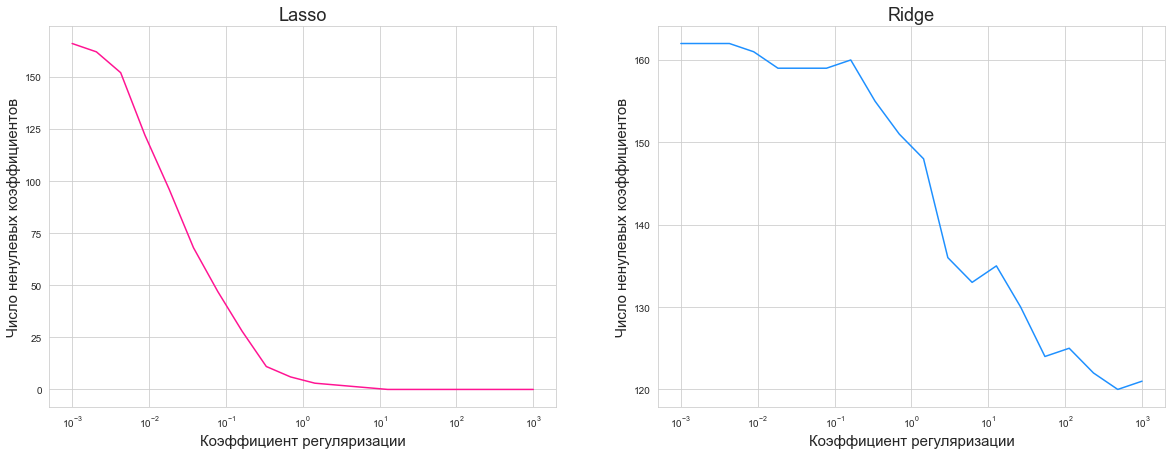

In [77]:
alphas = np.logspace(-3, 3, 20)
L_a = list()
R_a = list()

for i in alphas:
    Lasso_a = Lasso(alpha=i,  max_iter=10000).fit(X_train[0:1000], y_train[0:1000])
    Ridge_a = Ridge(alpha=i).fit(X_train[0:1000], y_train[0:1000])
    L_a.append(np.sum(Lasso_a.coef_ >= 1e-6))
    R_a.append(np.sum(Ridge_a.coef_ >= 1e-6))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(alphas, L_a, label='Lasso', color='DeepPink')
ax[0].set_xscale('log')
ax[0].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[0].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[0].set_title('Lasso', fontsize=18)

ax[1].plot(alphas, R_a, label='Ridge', color='DodgerBlue')
ax[1].set_xscale('log')
ax[1].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[1].set_ylabel('Число ненулевых коэффициентов', fontsize=15)
ax[1].set_title('Ridge', fontsize=18)

*Lasso: чем больше коэффициент регуляризации,тем меньше число ненулевых коэффициентов.*

*Ridge: чем больше коэффициент регуляризации,тем меньше число ненулевых коэффициентов.*

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [78]:
from sklearn.metrics import make_scorer

In [79]:
def RMSE(y_true, y_pred):
    
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [80]:
y_pred = ridge.predict(X_test)
print("RMSE =", RMSE(y_test, y_pred))
print("MAE =", mae(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

RMSE = 34.26435899412541
MAE = 16.927519832538156
R2 = 0.1223192513604755


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn.

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
# def RMSE_scorer(estmate, X, y):
#     return mse(estmate.predict(X), y)

# def MAE_scorer(estmate, X, y):
#     return mae(estmate.predict(X), y)

# def r2_scorer(estmate, X, y):
#     return r2_score(estmate.predict(X), y)

# RMSE = []
# MAE =[]
# R2 = []

# for alpha in logspace(-3, 3, 20):
#     RMSE.append(cross_val_sore(Ridge(alpha=alpha), X_train[0:1000], y_train[0:1000] cv=5, scoring=RMSE_scorer))
#     MAE.append(cross_val_sore(Ridge(alpha=alpha), X_train[0:1000], y_train[0:1000] cv=5, scoring=MAE_scorer))
#     R2.append(cross_val_sore(Ridge(alpha=alpha), X_train[0:1000], y_train[0:1000] cv=5, scoring=r2_scorer))

In [86]:
RMSE_scorer = make_scorer(RMSE, greater_is_better=False)

In [87]:
searcher_RMSE = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=RMSE_scorer, cv=5).fit(X_train[0:1000], y_train[0:1000])
searcher_MAE = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring='neg_mean_absolute_error', cv=5).fit(X_train[0:1000], y_train[0:1000])
searcher_R2 = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring='r2', cv=5).fit(X_train[0:1000], y_train[0:1000])

best_alpha_RMSE = searcher_RMSE.best_params_["alpha"]
best_alpha_MAE = searcher_MAE.best_params_["alpha"]
best_alpha_R2 = searcher_R2.best_params_["alpha"]

print(f"Best alpha RMSE =  {best_alpha_RMSE}")
print(f"Best alpha MAE = {best_alpha_MAE}")
print(f"Best alpha R2 = {best_alpha_R2}")

Best alpha RMSE =  6.158482110660261
Best alpha MAE = 2.976351441631316
Best alpha R2 = 12.742749857031322


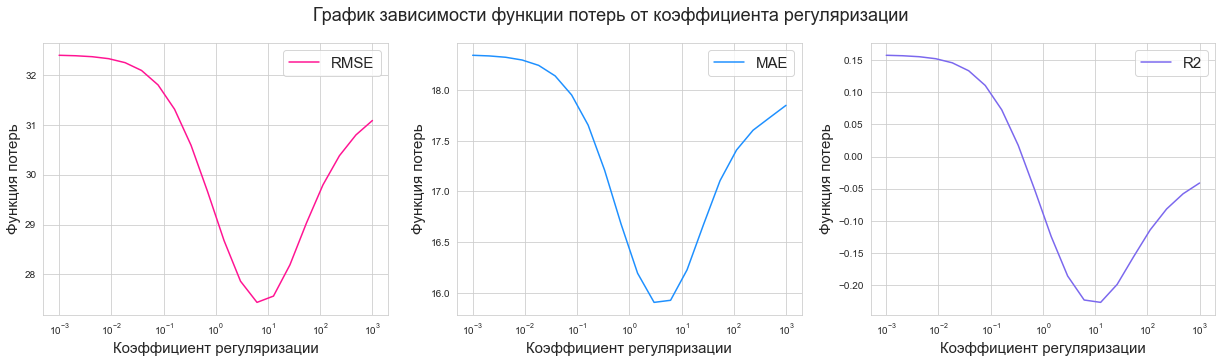

In [95]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
fig.suptitle('График зависимости функции потерь от коэффициента регуляризации\n', fontsize=18)

ax[0].plot(alphas, -searcher_RMSE.cv_results_["mean_test_score"], label='RMSE', color='DeepPink')
ax[0].set_xscale('log')
ax[0].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[0].set_ylabel('Функция потерь', fontsize=15)
ax[0].legend(fontsize=15)

ax[1].plot(alphas, -searcher_MAE.cv_results_["mean_test_score"], label='MAE', color='DodgerBlue')
ax[1].set_xscale('log')
ax[1].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[1].set_ylabel('Функция потерь', fontsize=15)
ax[1].legend(fontsize=15)

ax[2].plot(alphas, -searcher_R2.cv_results_["mean_test_score"], label='R2', color='MediumSlateBlue')
ax[2].set_xscale('log')
ax[2].set_xlabel('Коэффициент регуляризации', fontsize=15)
ax[2].set_ylabel('Функция потерь', fontsize=15)
ax[2].legend(fontsize=15)

Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [97]:
RMSE_R = Ridge(best_alpha_RMSE).fit(X_train[0:1000], y_train[0:1000])
MAE_R = Ridge(best_alpha_MAE).fit(X_train[0:1000], y_train[0:1000])
R2_R = Ridge(best_alpha_R2).fit(X_train[0:1000], y_train[0:1000])

y_pred_RMSE = RMSE_R.predict(X_test)
y_pred_MAE = MAE_R.predict(X_test)
y_pred_R2 = R2_R.predict(X_test)

print("RMSE =", RMSE(y_test, y_pred_RMSE))
print("MAE =", mae(y_test, y_pred_MAE))
print("R2 =", r2_score(y_test, y_pred_R2))

RMSE = 33.13536012514192
MAE = 16.465943889032225
R2 = 0.1740775589029313


Качество улучшилось.

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [98]:
from sklearn.model_selection import cross_val_predict

Text(0.5, 1.0, 'Гистограмма ошибки')

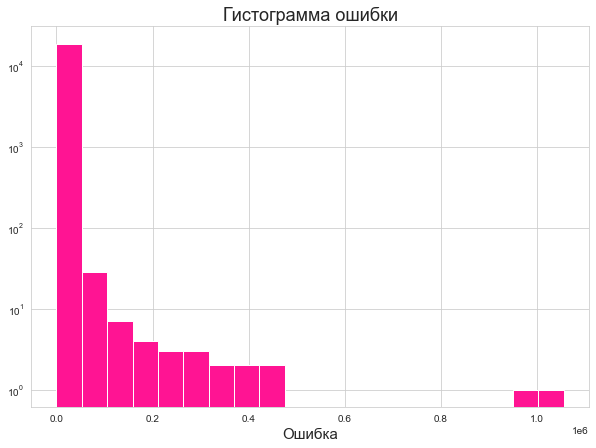

In [99]:
y_pred = cross_val_predict(Ridge(), X_test, y_test)
error = (y_pred - y_test) ** 2

fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(error, bins=20, facecolor = 'DeepPink')
ax.set_xlabel('Ошибка', fontsize=15)
ax.set_yscale('log')
ax.set_title('Гистограмма ошибки', fontsize=18)

Ошибки с небольшими значениями встречаются чаще.